In [1]:
import pandas as pd

## 1. Data type constraints

In [13]:
# load data
ride = pd.read_csv('dataset/ride_sharing_new.csv')

In [14]:
ride.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [51]:
ride.shape

(25760, 9)

In [15]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [20]:
ride.describe()

,Unnamed: 0,station_A_id,station_B_id,bike_id,user_type,user_birth_year
count,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000,25760.000000
mean,12879.500000,31.023602,89.558579,4107.621467,2.008385,1983.054969
std,7436.415803,26.409263,105.144103,1576.315767,0.704541,10.010992
min,0.000000,3.000000,3.000000,11.000000,1.000000,1901.000000
25%,6439.750000,15.000000,21.000000,3106.000000,2.000000,1978.000000
50%,12879.500000,21.000000,58.000000,4821.000000,2.000000,1985.000000
75%,19319.250000,67.000000,93.000000,5257.000000,3.000000,1990.000000
max,25759.000000,81.000000,383.000000,6638.000000,3.000000,2001.000000


In [34]:
ride.isnull().sum()

duration           0
station_A_id       0
station_A_name     0
station_B_id       0
station_B_name     0
bike_id            0
user_type          0
user_birth_year    0
user_gender        0
dtype: int64

In [23]:
# hapus kolom
ride.drop('Unnamed: 0', axis = 1, inplace = True)

In [28]:
# merubah data type duration

# hitung data yang memiliki kata 'minutes'
ride['duration'].str.contains(' minutes').sum()

25760

In [29]:
# hapus 'minutes' dan ubah data jadi integer
ride['duration'] = ride['duration'].str.strip(' minutes')
ride['duration'] = ride['duration'].astype('int')

In [32]:
#test
assert ride['duration'].dtype == 'int'

In [35]:
ride.user_type.value_counts()

2    12972
3     6502
1     6286
Name: user_type, dtype: int64

In [38]:
ride.user_gender.value_counts()

Male      19382
Female     6027
Other       351
Name: user_gender, dtype: int64

In [37]:
# kita ubah dtype user_type dan user_gender jadi kategori
ride['user_type'] = ride['user_type'].astype('category')
ride['user_gender'] = ride['user_gender'].astype('category')

## 2. Uniqueness constraints

### Menemukan data duplikat

In [46]:
# melihat apakah terdapat duplikat
ceck_for_duplicate = ride.duplicated(keep = False)

#untuk melihat duplicat tiap kolom menggunakan argumen subset

In [47]:
# cek jumlah duplikat
ceck_for_duplicate.value_counts()

False    25752
True         8
dtype: int64

In [50]:
# terdapat baris duplikat, kita lihat ..
ride[ceck_for_duplicate].sort_values('station_A_name')

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
566,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male
604,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male
9696,17,22,Howard St at Beale St,102,Irwin St at 8th St,492,3,1961,Female
15217,17,22,Howard St at Beale St,102,Irwin St at 8th St,492,3,1961,Female
9724,4,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male
20170,4,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male
7610,10,30,San Francisco Caltrain (Townsend St at 4th St),6,The Embarcadero at Sansome St,4442,1,1967,Male
18303,10,30,San Francisco Caltrain (Townsend St at 4th St),6,The Embarcadero at Sansome St,4442,1,1967,Male


In [52]:
# hapus data duplikat
ride.drop_duplicates(inplace = True)

In [53]:
ceck_for_duplicate = ride.duplicated(keep = False)
ceck_for_duplicate.value_counts()

False    25756
dtype: int64

## 3. Text and categorical data problems

#### Jika terdapat kategori yang tidak sesuai

In [63]:
# data
airlines = pd.read_csv('dataset/airlines_final.csv')

In [65]:
# data referensi kategori
cat = {'cleanliness': ['Clean','Average','Somewhat clean','Somewhat dirty','Dirty'],
        'safety': ['Neutral','Very safe','Somewhat safe','Very unsafe','Somewhat unsafe'],
         'satisfaction': ['Very satisfied','Neutral','Somewhat satisfied','Somewhat unsatisfied','Very unsatisfied']}

categories = pd.DataFrame(cat)

In [64]:
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [66]:
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [73]:
# cek kategori yang tidak konsisten

inconsistent_cat = set(airlines['cleanliness']).difference(categories['cleanliness'])


In [76]:
# ambil hanya categories yang konsisten
consistent_cat = ~airlines['cleanliness'].isin(inconsistent_cat)

In [79]:
# data konsisten
airlines_new = airlines[consistent_cat]

### Variabel Kategori

<li> value tidak konsisten
<li> Menyatukan kategori yang terlalu banyak menjadi lebih sedikit

In [80]:
airlines['dest_region'].unique()

array(['Asia', 'Canada/Mexico', 'West US', 'East US', 'Midwest US',
       'EAST US', 'Middle East', 'Europe', 'eur', 'Central/South America',
       'Australia/New Zealand', 'middle east'], dtype=object)

In [81]:
airlines['dest_size'].unique()

array(['Hub', 'Small', '    Hub', 'Medium', 'Large', 'Hub     ',
       '    Small', 'Medium     ', '    Medium', 'Small     ',
       '    Large', 'Large     '], dtype=object)

#### value tidak konsisten karena huruf

In [107]:
airlines['dest_region'] = airlines['dest_region'].str.title()

In [87]:
airlines['dest_region'].unique()

array(['Asia', 'Canada/Mexico', 'West Us', 'East Us', 'Midwest Us',
       'Middle East', 'Europe', 'Eur', 'Central/South America',
       'Australia/New Zealand'], dtype=object)

#### value tidak konsisten karena spasi

In [108]:
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [86]:
airlines['dest_size'].unique()

array(['Hub', 'Small', 'Medium', 'Large'], dtype=object)

#### value tidak konsisten karena terlalu banyak kategori

In [88]:
mapping = {'Canada/Mexico':'America','West Us':'America', 'East Us':'America',
        'Midwest Us':'America', 'Central/South America':'America',
       'Eur':'Europe', 'Middle East':'Asia', 'Australia/New Zealand':'Oceania'}

In [89]:
airlines['dest_region'] = airlines['dest_region'].replace(mapping)

In [91]:
airlines['dest_region'].unique()

array(['Asia', 'America', 'Europe', 'Oceania'], dtype=object)

#### membuat rentang kategori untuk numerik

In [95]:
import numpy as np

#rentang waktu
ranges =  [0, 60, 180, np.inf]
cat_names = ['short', 'medium', 'long']

In [105]:
# buat kategori
airlines['wait_type'] = pd.cut(airlines['wait_min'],
                               bins = ranges,
                               labels = cat_names)

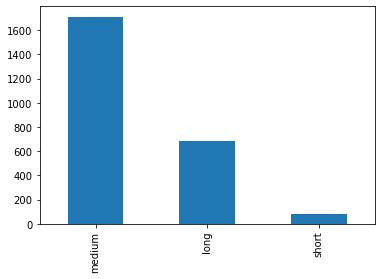

In [106]:
wait = airlines[['wait_min','wait_type']]
wait['wait_type'].value_counts().plot.bar();